<a href="https://colab.research.google.com/github/antariksh2648/Is-the-road-safe-assignment_PClub/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"antarikshchoudhary","key":"d00bb3e89e3f3f2d10083fbf8a2dca6a"}'}

In [3]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                        Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23          10388        315  1.0              
devansodariya/student-performance-data                          Student Performance Dataset                           7KB  2022-05-26 13:55:09           5820        180  0.9705882        
mohamedharris/supermart-grocery-sales-retail-analytics-dataset  Supermart Grocery Sales - Retail Analytics Dataset  191KB  2022-06-12 16:14:44            880         44  0.88235295       
sameepvani/nasa-nearest-earth-objects                       

In [7]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:28<00:00, 96.4MB/s]
100% 2.29G/2.29G [00:28<00:00, 85.2MB/s]


In [8]:
! unzip /content/chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [9]:
import tensorflow as tf  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import glob
import os

In [10]:
image_net = glob.glob("/content/chest_xray/chest_xray/train/*/**")

In [11]:
len(image_net)

5216

In [12]:
image_net[0]

'/content/chest_xray/chest_xray/train/PNEUMONIA/person342_virus_702.jpeg'

In [13]:
from random import shuffle
shuffle(image_net)
image_net

['/content/chest_xray/chest_xray/train/PNEUMONIA/person1005_bacteria_2936.jpeg',
 '/content/chest_xray/chest_xray/train/PNEUMONIA/person1273_virus_2191.jpeg',
 '/content/chest_xray/chest_xray/train/PNEUMONIA/person1546_bacteria_4045.jpeg',
 '/content/chest_xray/chest_xray/train/PNEUMONIA/person1175_virus_1981.jpeg',
 '/content/chest_xray/chest_xray/train/PNEUMONIA/person1395_virus_2398.jpeg',
 '/content/chest_xray/chest_xray/train/PNEUMONIA/person832_virus_1468.jpeg',
 '/content/chest_xray/chest_xray/train/PNEUMONIA/person319_bacteria_1475.jpeg',
 '/content/chest_xray/chest_xray/train/PNEUMONIA/person1141_virus_1890.jpeg',
 '/content/chest_xray/chest_xray/train/PNEUMONIA/person670_virus_1256.jpeg',
 '/content/chest_xray/chest_xray/train/PNEUMONIA/person67_bacteria_334.jpeg',
 '/content/chest_xray/chest_xray/train/PNEUMONIA/person1639_bacteria_4343.jpeg',
 '/content/chest_xray/chest_xray/train/PNEUMONIA/person1468_bacteria_3822.jpeg',
 '/content/chest_xray/chest_xray/train/PNEUMONIA/per

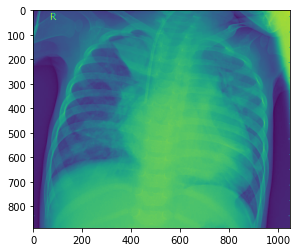

In [14]:
from PIL import Image
img=Image.open(image_net[0])
plt.imshow(img)

In [15]:
np.array(img).shape

(888, 1048)

In [16]:
v=(128,128)

In [17]:
import cv2

In [18]:
img=cv2.imread(image_net[0],cv2.IMREAD_GRAYSCALE)
img1 = np.array(img)
p = cv2.resize(img1,v)

In [19]:
p.shape

(128, 128)

In [20]:
X_train=np.zeros((len(image_net),128,128))
Y_train=np.zeros((len(image_net),1))
for i, fi in enumerate(image_net):
    img=cv2.imread(fi,cv2.IMREAD_GRAYSCALE)
    img1 = np.array(img)
    p = cv2.resize(img1,v)
    X_train[i,:,:]=p
    Y_train[i]=   fi[-6]

In [32]:
Y_train = Y_train-1

In [33]:
Y_train

array([[5.],
       [0.],
       [4.],
       ...,
       [5.],
       [5.],
       [8.]])

In [22]:
X_train[0]

array([[ 26.,  34.,  48., ..., 219., 221., 224.],
       [ 33.,  37., 106., ..., 219., 223., 224.],
       [ 36.,  37.,  85., ..., 220., 222., 223.],
       ...,
       [ 21.,  20.,  14., ...,  28.,  28.,  28.],
       [ 21.,  21.,  14., ...,  29.,  28.,  28.],
       [ 21.,  20.,  14., ...,  28.,  28.,  28.]])

In [23]:
X_train/255.0

array([[[0.10196078, 0.13333333, 0.18823529, ..., 0.85882353,
         0.86666667, 0.87843137],
        [0.12941176, 0.14509804, 0.41568627, ..., 0.85882353,
         0.8745098 , 0.87843137],
        [0.14117647, 0.14509804, 0.33333333, ..., 0.8627451 ,
         0.87058824, 0.8745098 ],
        ...,
        [0.08235294, 0.07843137, 0.05490196, ..., 0.10980392,
         0.10980392, 0.10980392],
        [0.08235294, 0.08235294, 0.05490196, ..., 0.11372549,
         0.10980392, 0.10980392],
        [0.08235294, 0.07843137, 0.05490196, ..., 0.10980392,
         0.10980392, 0.10980392]],

       [[0.24313725, 0.26666667, 0.28235294, ..., 0.12941176,
         0.48235294, 0.81960784],
        [0.25882353, 0.2745098 , 0.30196078, ..., 0.0745098 ,
         0.44705882, 0.80392157],
        [0.2627451 , 0.25882353, 0.28235294, ..., 0.0745098 ,
         0.44313725, 0.8       ],
        ...,
        [0.01960784, 0.01568627, 0.02745098, ..., 0.        ,
         0.        , 0.16470588],
        [0.0

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

In [25]:
model = keras.Sequential()
model.add(Conv2D(32,(3,3),strides=2,padding='Same',activation='relu',input_shape
         =(128, 128, 1)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.3)) #here added dropout
model.add(Conv2D(64,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation = "softmax"))


In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0

In [29]:
X_train=X_train.reshape(len(X_train),128,128,1)
Y_train.shape

(5216, 1)

In [30]:
X_train.shape

(5216, 128, 128, 1)

In [38]:
Y_train/255.0

array([[0.01960784],
       [0.        ],
       [0.01568627],
       ...,
       [0.01960784],
       [0.01960784],
       [0.03137255]])

In [40]:
model.fit(X_train,Y_train/255.0,epochs=2,validation_split=0.1)

Epoch 1/2
147/147 [==============================] - 100s 680ms/step - loss: 0.0000e+00 - accuracy: 0.3206 - val_loss: 0.0000e+00 - val_accuracy: 0.3410
Epoch 2/2
147/147 [==============================] - 98s 667ms/step - loss: 0.0000e+00 - accuracy: 0.3206 - val_loss: 0.0000e+00 - val_accuracy: 0.3410
